## Cancer prediction using Decision Tree

Dataset used is the **Wisconsin Diagnostic Breast Cancer(WDBC)** dataset from the UCI repository. Each row in the dataset represents a sample of biopsied tissue. The tissue for each sample is imaged and 10 characteristics of the nuclei of cells present in each image are characterized. These characteristics are: Radius, Texture, Perimeter, Area, Smoothness, Compactness, Concavity, Number of concave portions of contour, Symmetry, Fractal dimension. Each sample used in the dataset is a feature vector of length 30. The first 10 entries in this feature vector are the mean of the characteristics listed above for each image. The second 10 are the standard deviation and last 10 are the largest value of each of these characteristics present in each image.

- Training data : `trainX.csv` consisting of 455 samples, 30 attributes. The label associated with each sample is provided in `trainY.csv`. A label of value 1 indicates the sample was for malignant (cancerous) tissue, 0 indicates the sample was for benign tissue.

- Test data : `testX.csv` consisting of 57 samples, 30 attributes. The label associated with each sample is provided in `testY.csv`.


*Problem*: Use decision trees to classify the test data. Estimate the misclassification rates of both
classes and populate the 2x2 confusion matrix.

(i) Report the following: (a) Plot of decision tree model. (b) the total number of nodes in the tree.
(c) the total number of leaf nodes in the tree.

(ii) Train your binary decision tree with increasing sizes of training set, say 10%, 20%, ..., 100%.
and test the trees with the test set. Make a plot to show how training and test accuracies vary with
number of training samples.

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree
from sklearn.cross_validation import cross_val_score

import pydotplus
import collections
from IPython.display import Image

from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

# To turn off warnings
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Reading csv file as a numpy array
X_train = pd.read_csv('P1_data/trainX.csv', header=None).as_matrix()
y_train = pd.read_csv('P1_data/trainY.csv', header=None).as_matrix()
X_test = pd.read_csv('P1_data/testX.csv', header=None).as_matrix()
y_test = pd.read_csv('P1_data/testY.csv', header=None).as_matrix()

y_train = y_train.reshape((y_train.shape[0],))
y_test = y_test.reshape((y_test.shape[0],))

# Concatenate test and training set togetherr
X = np.concatenate([X_train, X_test], axis=0)
y = np.concatenate([y_train, y_test], axis=0)

m, n = X_train.shape

# Print training and test set sizes for sanity check
print X_train.shape, y_train.shape
print X_test.shape,  y_test.shape

(455, 30) (455,)
(57, 30) (57,)


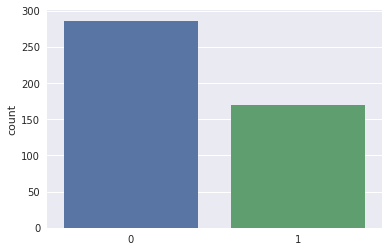

In [3]:
# Plot to show count of data of each label in the training set
ax = sns.countplot(y_train, label="Count")

## Decision Tree Classifier

First do a dirty implementation of `DecisionTreeClassifier` from sklearn to check base accuracy and then add complexity to the model to improve its performance.

In [4]:
model = DecisionTreeClassifier(criterion = "entropy")
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
train_acc = accuracy_score(y_train, y_train_pred)

y_pred = model.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)

print 'Training accuracy : %.2f%%'%(train_acc*100)
print 'Test accuracy : %.2f%%'%(test_acc*100)

Training accuracy : 100.00%
Test accuracy : 94.74%


In [5]:
print confusion_matrix(y_pred, y_test)

[[32  3]
 [ 0 22]]


#### Confusion Matrix
| Class 	| True benign 	|  True malignant	|
|---	|---	|---	|
|  **Predicted benign**	| 32 	| 3 	|
|  **Predicted malignant**	| 0 	| 22 	|

#### Misclassification rate
| Class 	| Benign 	|  Malignant	|  Overall	|
|---	|---	|---	|
|  **Error**	|   0%	|   12%	|  5.26%	|

## Cross Validation

Since the training accuracy is 100%, the model has high variance and it is overfitting on the dataset. Inorder to prevent overfitting, we can try restricting the size of the decision tree.

I have used the **`cross_val_score`** function from sklearn library to perform 3-fold cross-validation on the dataset. Higher score signifies better model.

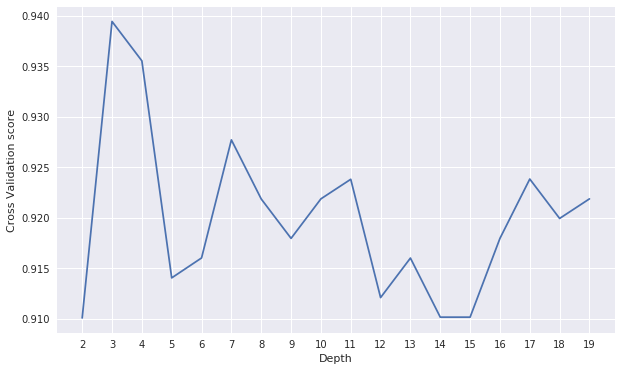

In [6]:
# List to store cross_val_score and plot it
score = []

# Max allowed depth varying from 2 to 19
depth = range(2,20)

# Cross-validation by varying maximum depth of the tree
for i in depth:
    test_model = DecisionTreeClassifier(max_depth=i)
    scores = cross_val_score(estimator=test_model, X=X, y=y, cv=3)
    score.append(scores.mean())
    
# Plot to show cross_val_score vs max_depth of the tree
fig = plt.figure(figsize=(10,6))
plt.plot(depth, score)
plt.xticks(depth)
plt.xlabel('Depth')
plt.ylabel('Cross Validation score')
plt.show()

best_estimate = score.index(max(score))+2

## Improved Decision Tree Classifier

In [7]:
# Build a new tree with restriction on its maximum depth
# The best estimate is found out by cross-validation

model = DecisionTreeClassifier(criterion = "entropy", max_depth=best_estimate)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
train_acc = accuracy_score(y_train, y_train_pred)

y_pred = model.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)

print 'Training accuracy : %.2f%%'%(train_acc*100)
print 'Test accuracy : %.2f%%'%(test_acc*100)

Training accuracy : 97.58%
Test accuracy : 96.49%


In [8]:
print confusion_matrix(y_pred, y_test)

[[32  2]
 [ 0 23]]


## Model evaluation

#### Confusion Matrix
| Class 	| True benign 	|  True malignant	|
|---	|---	|---	|
|  **Predicted benign**	| 32 	| 2 	|
|  **Predicted malignant**	| 0 	| 23 	|

#### Misclassification rate
| Class 	| Benign 	|  Malignant	|  Overall	|
|---	|---	|---	|
|  **Error**	|   0%	|   8%	|  3.51%	|

In [9]:
print classification_report(y_pred, y_test)

             precision    recall  f1-score   support

          0       1.00      0.94      0.97        34
          1       0.92      1.00      0.96        23

avg / total       0.97      0.96      0.97        57



## Visualizing Decision Tree

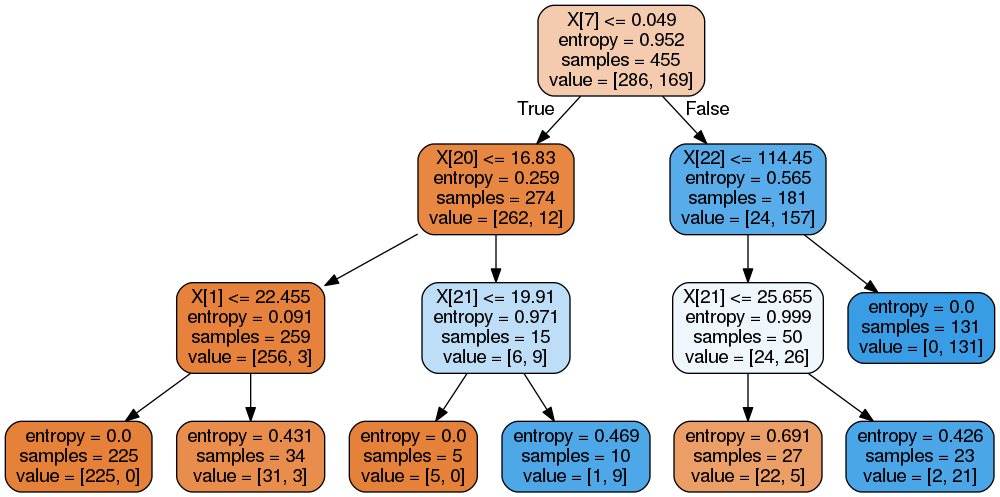

In [10]:
# Visualizing decision tree
dot_data = export_graphviz(model, out_file=None, filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)
 
graph.write_png('tree.png')
Image('tree.png')

## Node count

In [11]:
n_nodes = model.tree_.node_count
leaf_nodes = len(np.unique(model.apply(X_train)))

print 'No. of total nodes : %d'%(n_nodes)
print 'No. of leaf nodes : %d'%(leaf_nodes)

No. of total nodes : 13
No. of leaf nodes : 7


## Important features

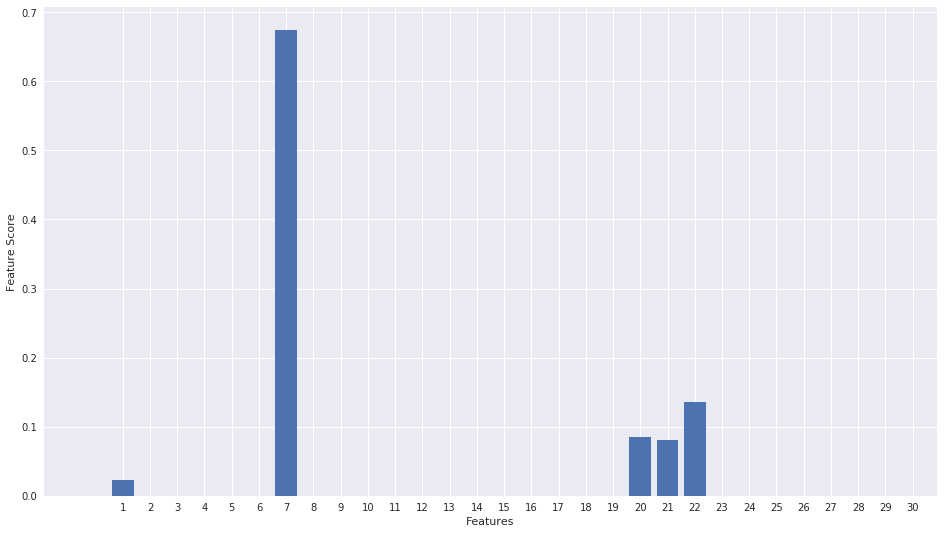

In [16]:
feature_score = list(model.feature_importances_)

fig = plt.figure(figsize=(16,9))
plt.bar(range(len(feature_score)), feature_score, align='center')
plt.xticks(range(1,len(feature_score)+1))
plt.xlabel('Features')
plt.ylabel('Feature Score')
plt.show()

## Incremental Training

The following part refers to the part 2 of the problem. The decision tree is trained incrementally by increasing size of training set 10%, 20%, ..., 100% and the test accuracy is evaluated with the test set.

As expected with very little data, the model overfits and remembers the training set. Hence, the model fails to generalize well and the poor performance is reflected in the test accuracy.

In [12]:
model2 = DecisionTreeClassifier(criterion = "entropy")

In [13]:
train_acc = []
test_acc = []

for i in range(10, 101, 10):
    index = int((n*i)/100)
    
    model2.fit(X_train[:index,:], y_train[:index])
    
    y_train_pred = model2.predict(X_train[:index,:])
    train = accuracy_score(y_train[:index], y_train_pred)
    
    y_pred = model2.predict(X_test)
    test = accuracy_score(y_test, y_pred)
    
    train_acc.append(train)
    test_acc.append(test)

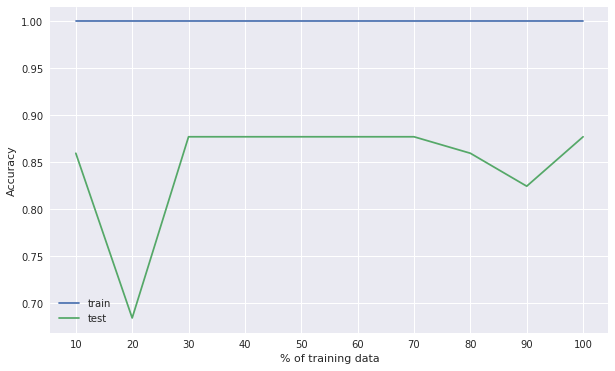

In [14]:
xtick = range(10,101,10)
fig = plt.figure(figsize=(10,6))
plt.plot(xtick, train_acc, label='train')
plt.hold('on')
plt.plot(xtick, test_acc, label='test')
plt.xlabel('% of training data')
plt.ylabel('Accuracy')
plt.xticks(xtick)
plt.legend()
plt.show()